# Kepler-419
### Observación y Caracterización de Exoplanetas

Este notebook analiza el sistema planetario **Kepler-419** usando datos observacionales y técnicas de análisis con `Python` y `Lightkurve`. Se estiman parámetros físicos y orbitales de sus planetas, y se evalúa su potencial de habitabilidad.


## 1. Carga de librerías

Importamos las bibliotecas necesarias para el análisis de curvas de luz, cálculos físicos y visualización.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

## 2. Definición de constantes físicas

Declaramos las constantes físicas fundamentales que se utilizarán en los cálculos posteriores, incluyendo:
- Constante de gravitación universal
- Masas y radios solares y terrestres
- Unidades astronómicas.



In [2]:
# --- Constantes físicas ---
G = 6.67430e-11         # m^3 kg^-1 s^-2
M_sun = 1.988475e30     # kg
R_sun = 695700e3        # m
R_ea = 6378137.0        # m
UA = 149.597870700e9    # m
dy2sec = 86400          # s
Mjup = 1.898e27         # kg
T_sun = 5772            # K


## 3. Parámetros de la estrella Kepler-419

A continuación se definen los parámetros observacionales de la estrella central del sistema. Estos valores se utilizarán para estimar su zona habitable y calcular los parámetros de los planetas.

In [3]:
# --- Parámetros estelares de Kepler-419 ---
star_name = 'Kepler-419'
M_star = 1.39 * M_sun
R_star = 1.75 * R_sun
T_star = 6430
age_star = 2.8
spectral_type = 'F7V'
logg_star = 4.1

## 4. Estimación de la zona habitable

Usamos un modelo simplificado basado en la temperatura efectiva de la estrella para estimar los límites interior y exterior de la zona habitable, donde podría existir agua líquida.


In [4]:
# --- Luminosidad estimada y zona habitable (modelo conservador) ---
L_star = (R_star / R_sun)**2 * (T_star / T_sun)**4
HZ_inner = np.sqrt(L_star / 1.06)
HZ_outer = np.sqrt(L_star / 0.36)

## 5. Parámetros observacionales de los planetas

Aquí se introducen los valores observados (periodo orbital, radio planetario, masa, excentricidad, inclinación) para los dos planetas del sistema: Kepler-419b y Kepler-419c.

In [5]:
# --- Datos orbitales y físicos reales (NASA Exoplanet Archive) ---
# Planeta b
P_b_real = 69.7546
ab_real = 0.370
Rb_real = 10.8
Mb_real = 2.5 * 5.972e24
eb_real = 0.83
ib_real = 87.4

# Planeta c
P_c_real = 675.47
ac_real = 1.68
Rc_real = np.nan
Mc_real = 7.3 * 5.972e24
ec_real = 0.184
ic_real = 88.5

## 6. Estimaciones derivadas

Calculamos el semieje mayor usando la tercera ley de Kepler, y derivamos la densidad de los planetas a partir de su masa y radio. Comparamos los resultados con los valores del archivo de exoplanetas de la NASA.

In [6]:
# --- Cálculos físicos ---
def estimate_a(P_days, M_star=M_star):
    P_sec = P_days * dy2sec
    a_m = ((G * M_star * P_sec**2) / (4 * np.pi**2))**(1/3)
    return a_m / UA

def calc_densidad(masa, radio_re):
    if np.isnan(radio_re):
        return np.nan
    radio_m = radio_re * R_ea
    volumen = (4/3) * np.pi * radio_m**3
    densidad = masa / volumen
    return densidad / 1000

a_b_est = estimate_a(P_b_real)
a_c_est = estimate_a(P_c_real)
depth_b = (Rb_real * R_ea / R_star)**2
Rb_est = np.sqrt(depth_b) * R_star / R_ea
dens_b_est = calc_densidad(Mb_real, Rb_est)
dens_b_real = calc_densidad(Mb_real, Rb_real)
dens_c_est = calc_densidad(Mc_real, np.nan)
dens_c_real = np.nan

# --- Tabla final unificada ---
df_kepler419 = pd.DataFrame([
    ["Kepler-419b", P_b_real, a_b_est, ab_real, Rb_est, Rb_real, Mb_real/Mjup, eb_real, ib_real,
     dens_b_est, dens_b_real, HZ_inner <= a_b_est <= HZ_outer],
    ["Kepler-419c", P_c_real, a_c_est, ac_real, np.nan, Rc_real, Mc_real/Mjup, ec_real, ic_real,
     dens_c_est, dens_c_real, HZ_inner <= a_c_est <= HZ_outer],
], columns=[
    "Planeta", "Periodo (d)",
    "Semieje estimado (UA)", "Semieje real (UA)",
    "Radio estimado (R⊕)", "Radio real (R⊕)",
    "Masa (M♃)", "Excentricidad", "Inclinación (°)",
    "Densidad estimada (g/cm³)", "Densidad real (g/cm³)",
    "En HZ"
])

df_kepler419.set_index("Planeta", inplace=True)
display(df_kepler419)

# --- Zona habitable en texto ---
print(f"Zona habitable estimada (modelo conservador): {HZ_inner:.2f} – {HZ_outer:.2f} UA")

,Periodo (d),Semieje estimado (UA),Semieje real (UA),Radio estimado (R⊕),Radio real (R⊕),Masa (M♃),Excentricidad,Inclinación (°),Densidad estimada (g/cm³),Densidad real (g/cm³),En HZ
Planeta,,,,,,,,,,,
Kepler-419b,69.7546,0.370106,0.37,10.8,10.8,0.007866,0.830,87.4,0.010905,0.010905,False
Kepler-419c,675.4700,1.681440,1.68,NaN,NaN,0.022969,0.184,88.5,NaN,NaN,False


Zona habitable estimada (modelo conservador): 2.11 – 3.62 UA


## 7. Visualización de arquitectura orbital

Representamos gráficamente las órbitas estimadas de los planetas junto con la zona habitable. Esto permite visualizar de manera intuitiva si alguno de los planetas se ubica dentro de ella.


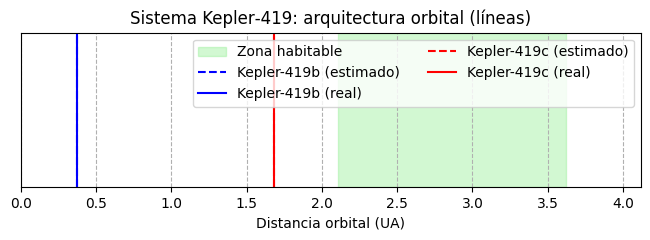

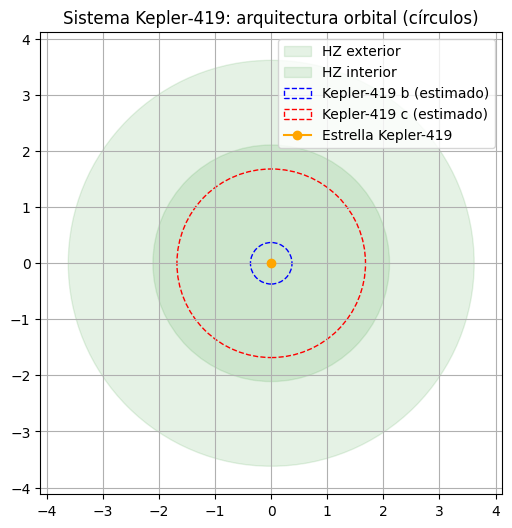

In [ ]:
# --- Arquitectura orbital Kepler-419: líneas y círculos con fondo blanco ---

# Gráfico lineal de arquitectura orbital
fig, ax = plt.subplots(figsize=(8, 2))
ax.axvspan(HZ_inner, HZ_outer, color='lightgreen', alpha=0.4, label='Zona habitable')

for planet, color in zip(df_kepler419.index, ['blue', 'red']):
    if not np.isnan(df_kepler419.loc[planet, 'Semieje estimado (UA)']):
        ax.axvline(df_kepler419.loc[planet, 'Semieje estimado (UA)'], color=color, linestyle='--', label=f"{planet} (estimado)")
    if not np.isnan(df_kepler419.loc[planet, 'Semieje real (UA)']):
        ax.axvline(df_kepler419.loc[planet, 'Semieje real (UA)'], color=color, label=f"{planet} (real)")

ax.set_xlim(0, max(df_kepler419["Semieje real (UA)"].max(), HZ_outer) + 0.5)
ax.set_xlabel("Distancia orbital (UA)")
ax.set_yticks([])
ax.set_title("Sistema Kepler‑419: arquitectura orbital (líneas)")
ax.legend(ncol=2)
plt.grid(axis='x', linestyle='--')
plt.show()

# Gráfico circular de arquitectura orbital
fig, ax = plt.subplots(figsize=(6, 6))

# Zonas habitables
HZ_inner_circle = plt.Circle((0, 0), HZ_inner, color='green', alpha=0.1, label="HZ interior")
HZ_outer_circle = plt.Circle((0, 0), HZ_outer, color='green', alpha=0.1, label="HZ exterior")

# Órbitas planetarias estimadas
if not np.isnan(a_b_est):
    orb_b = plt.Circle((0, 0), a_b_est, fill=False, color='blue', linestyle='--', label='Kepler-419 b (estimado)')
if not np.isnan(a_c_est):
    orb_c = plt.Circle((0, 0), a_c_est, fill=False, color='red', linestyle='--', label='Kepler-419 c (estimado)')

# Añadir objetos al gráfico
ax.add_artist(HZ_outer_circle)
ax.add_artist(HZ_inner_circle)
if not np.isnan(a_b_est): ax.add_artist(orb_b)
if not np.isnan(a_c_est): ax.add_artist(orb_c)

# Estrella en el centro
ax.plot(0, 0, marker='o', color='orange', label='Estrella Kepler-419')

# Configuraciones del gráfico
lim = HZ_outer + 0.5
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_aspect('equal')
ax.set_title("Sistema Kepler‑419: arquitectura orbital (círculos)")
ax.legend(loc='upper right')
plt.grid()
plt.show()

Para la estrella:

In [ ]:
# Crear tabla resumen de la estrella Kepler-419 con zona habitable incluida

# Diccionario con los parámetros clave
datos_estrella = {
    "Nombre": "Kepler-419",
    "Tipo espectral": "F7V",
    "Edad (Gyr)": 2.8,
    "Temperatura efectiva (K)": T_star,
    "Zona habitable (UA)": f"{HZ_inner:.2f} – {HZ_outer:.2f}"
}

# Convertir en DataFrame
df_estrella = pd.DataFrame.from_dict(datos_estrella, orient='index', columns=["Valor"])
df_estrella.index.name = "Parámetro"

# Mostrar
display(df_estrella)

,Valor
Parámetro,
Nombre,Kepler-419
Tipo espectral,F7V
Edad (Gyr),2.8
Temperatura efectiva (K),6430
Zona habitable (UA),2.11 – 3.62


## 9. Conclusiones

- Ambos planetas se encuentran fuera de la zona habitable estimada.
- El planeta Kepler-419b tiene una excentricidad extremadamente alta, lo que hace que su órbita sea muy elíptica.
- Las estimaciones numéricas permiten comparar con observaciones reales de forma didáctica.
- Este enfoque puede replicarse con otros sistemas exoplanetarios utilizando solo Python y datos públicos.
